# 机器学习中调参的基本思想是什么

我发现大多数的机器学习相关的书都是遍历各种算法和案例，为大家讲解各种各样算法的原理和用途，但却对调参探究甚少。这中间有许多原因，其一是因为，调参的方式总是根据数据的状况而定，所以没有办法一概而论；其二是因为，其实大家也都没有特别好的办法。

通过画学习曲线，或者网格搜索，我们能够探索到调参边缘（代价可能是训练一次模型要跑三天三夜），但是在现实中，高手调参恐怕还是多依赖于经验，而这些经验，来源于：
1）非常正确的调参思路和方法，   
2）对模型评估指标的理解，  
3）对数据的感觉和经验，  
4）用洪荒之力去不断地尝试。

我们也许无法学到高手们多年累积的经验，但我们可以学习他们对模型评估指标的理解和调参的思路。

那我们首先来讲讲正确的调参思路。模型调参，第一步是要找准目标：我们要做什么？一般来说，这个目标是提升某个模型评估指标，比如对于随机森林来说，我们想要提升的是模型在未知数据上的准确率（由score或oob_score_来衡量）。找准了这个目标，我们就需要思考：模型在未知数据上的准确率受什么因素影响？在机器学习中，我们**用来衡量模型在未知数据上的准确率的指标，叫做泛化误差（Genelization error）。**

### 泛化误差

当模型在未知数据（测试集或者袋外数据）上表现糟糕时，我们说模型的泛化程度不够，泛化误差大，模型的效果不好。泛化误差受到模型的结构（复杂度）影响。看下面这张图，它准确地描绘了泛化误差与模型复杂度的关系，当模型太复杂，模型就会过拟合，泛化能力就不够，所以泛化误差大。当模型太简单，模型就会欠拟合，拟合能力就不够，所以误差也会大。只有当模型的复杂度刚刚好的才能够达到泛化误差最小的目标。

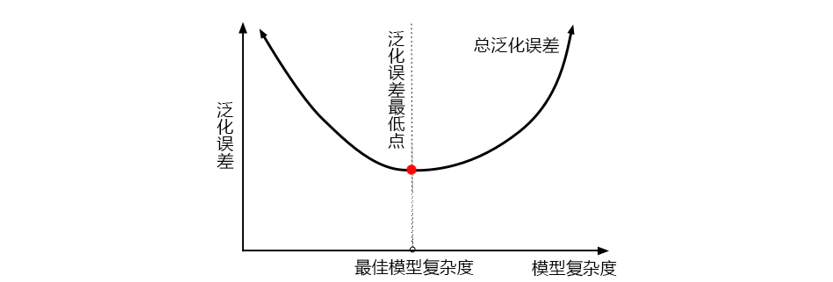

那模型的复杂度与我们的参数有什么关系呢？  
对树模型来说，树越茂盛，深度越深，枝叶越多，模型就越复杂。所以**树模型是天生位于图的右上角的模型**，随机森林是以树模型为基础，所以随机森林也是天生复杂度高的模型。   
随机森林的参数，都是向着一个目标去：减少模型的复杂度，把模型往图像的左边移动，防止过拟合。    
当然了，调参没有绝对，也有天生处于图像左边的随机森林，所以调参之前，我们要先判断，模型现在究竟处于图像的哪一边。

泛化误差的背后其实是“偏差-方差困境”，原理十分复杂，无论你翻开哪一本书，你都会看见长篇的数学论证和每个字都能看懂但是连在一起就看不懂的文字解释。在下一节偏差vs方差中，我用最简单易懂的语言为大家解释了泛化误差背后的原理，大家选读。那我们只需要记住这四点：

1）模型太复杂或者太简单，都会让泛化误差高，我们追求的是位于中间的平衡点

2）模型太复杂就会过拟合，模型太简单就会欠拟合

3）对树模型和树的集成模型来说，树的深度越深，枝叶越多，模型越复杂

4）树模型和树的集成模型的目标，都是减少模型复杂度，把模型往图像的左边移动

那具体每个参数，都如何影响我们的复杂度和模型呢？我们一直以来调参，都是在学习曲线上轮流找最优值，盼望能够将准确率修正到一个比较高的水平。然而我们现在了解了随机森林的调参方向：降低复杂度，我们就可以将那些对复杂度影响巨大的参数挑选出来，研究他们的单调性，然后专注调整那些能最大限度让复杂度降低的参数。对于那些不单调的参数，或者反而会让复杂度升高的参数，我们就视情况使用，大多时候甚至可以退避。基于经验，我对各个参数对模型的影响程度做了一个排序。在我们调参的时候，大家可以参考这个顺序。

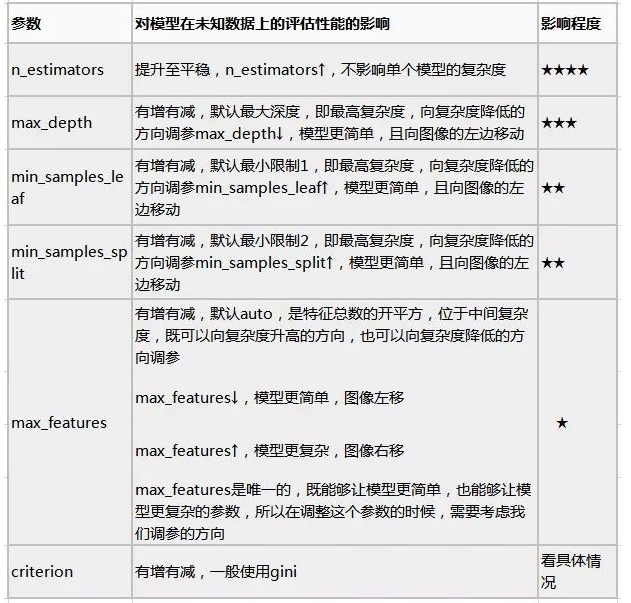

有了以上的知识储备，我们现在也能够通过参数的变化来了解，模型什么时候到达了极限，当复杂度已经不能再降低的时候，我们就不必再调整了，因为调整大型数据的参数是一件非常费时费力的事。除了学习曲线和网格搜索，我们现在有了基于对模型和正确的调参思路的“推测”能力，这能够让我们的调参能力更上一层楼。

### 偏差 vs 方差

一个集成模型(f)在未知数据集(D)上的泛化误差E(f;D)，由方差(var)，偏差(bais)和噪声(ε)共同决定。

观察下面的图像，每个点就是集成算法中的一个基评估器产生的预测值。红色虚线代表着这些预测值的均值，而蓝色的线代表着数据本来的面貌。

偏差：模型的预测值与真实值之间的差异，即每一个红点到蓝线的距离。在集成算法中，每个基评估器都会有自己的偏差，集成评估器的偏差是所有基评估器偏差的均值。模型越精确，偏差越低。

方差：反映的是模型每一次输出结果与模型预测值的平均水平之间的误差，即每一个红点到红色虚线的距离，衡量模型的稳定性。模型越稳定，方差越低。

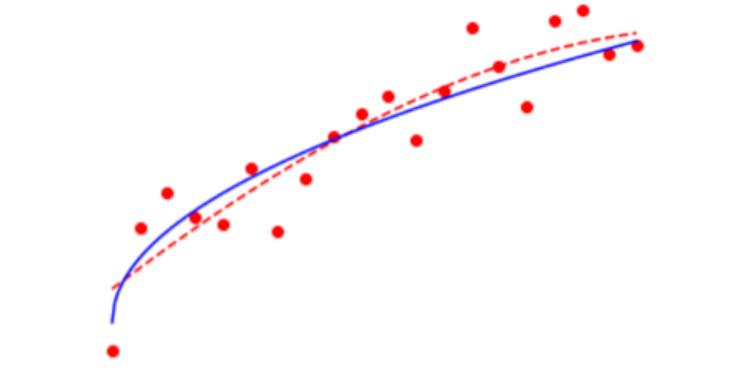

其中偏差衡量模型是否预测得准确，偏差越小，模型越“准”；而方差衡量模型每次预测的结果是否接近，即是说方差越小，模型越“稳”；噪声是机器学习无法干涉的部分，为了让世界美好一点，我们就不去研究了。一个好的模型，要对大多数未知数据都预测得”准“又”稳“。即是说，当偏差和方差都很低的时候，模型的泛化误差就小，在未知数据上的准确率就高。

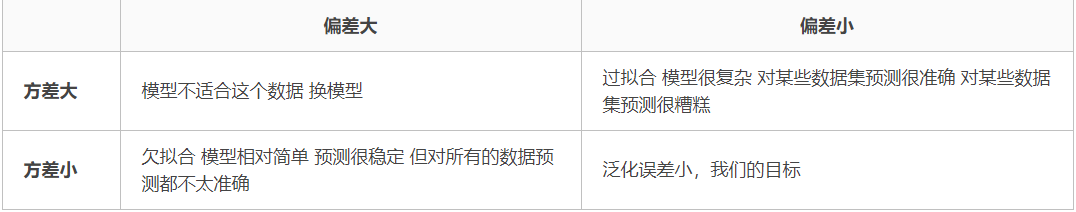   
貌似说反了

通常来说，方差和偏差有一个很大，泛化误差都会很大。然而，方差和偏差是此消彼长的，不可能同时达到最小值。这个要怎么理解呢？来看看下面这张图：

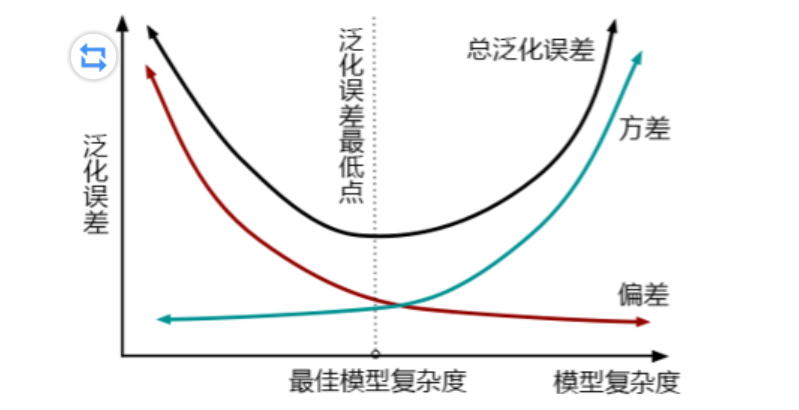

从图上可以看出，模型复杂度大的时候，方差高，偏差低。偏差低，就是要求模型要预测得“准”。模型就会更努力去学习更多信息，会具体于训练数据，这会导致，模型在一部分数据上表现很好，在另一部分数据上表现却很糟糕。模型泛化性差，在不同数据上表现不稳定，所以方差就大。而要尽量学习训练集，模型的建立必然更多细节，复杂程度必然上升。所以，**复杂度高，方差高，总泛化误差高。**

相对的，复杂度低的时候，方差低，偏差高。方差低，要求模型预测得“稳”，泛化性更强，那对于模型来说，它就不需要对数据进行一个太深的学习，只需要建立一个比较简单，判定比较宽泛的模型就可以了。结果就是，模型无法在某一类或者某一组数据上达成很高的准确度，所以偏差就会大。所以，**复杂度低，偏差高，总泛化误差高。**

**我们调参的目标是，达到方差和偏差的完美平衡！** 虽然方差和偏差不能同时达到最小值，但他们组成的泛化误差却可以有一个最低点，而我们就是要寻找这个最低点。对复杂度大的模型，要降低方差，对相对简单的模型，要降低偏差。随机森林的基评估器都拥有较低的偏差和较高的方差，因为决策树本身是预测比较”准“，比较容易过拟合的模型，装袋法本身也要求基分类器的准确率必须要有50%以上。**所以以随机森林为代表的装袋法的训练过程旨在降低方差，即降低模型复杂度，所以随机森林参数的默认设定都是假设模型本身在泛化误差最低点的右边。**

我们在降低复杂度的时候，本质其实是在降低随机森林的方差，随机森林所有的参数，也都是朝着降低方差的目标去。有了这一层理解，我们对复杂度和泛化误差的理解就更上一层楼了，对于我们调参，也有了更大的帮助。